![](https://cdn-images-1.medium.com/max/1600/1*mc5YIn7jvo5uwuqBOUDw7Q.jpeg)

# Investigating numpy.random

### Project Intentions
 - Examine the Simple Random Data functions in the numpy.random package.
 - Examine functions for permutating and sampling objects, in the numpy.random package
 - Investigate five probability distributions with reference to functions in the numpy.random package.
 - Explain the concept of pseudorandom numbers, and the use of seeds in generating pseudorandom data.

### About NumPy

Numpy is a library in Python that provides the capability to perform operations on large multi-dimensional arrays and matrices.
It was created in 2005, when features of Numarray and Numeric, were combined with other modifications. 

It's an open source package that was designed with the scientific and engineering communities in mind. Numpy's array ordered computing allows for high performance; quickly performing complex calculations, and it has is capable of generating large sets of random data very quickly. 





### Libraries

In [2]:
import numpy as np #For generating random numbers
from numpy.random import RandomState #Import RandomState separately
import matplotlib.pyplot as plt #For plotting distributions of data
from matplotlib.ticker import PercentFormatter #For probability density functions
import seaborn as sns #Mainly used for distplot
import pandas as pd #For putting results in DFs
import collections
%matplotlib inline 

## Simple Random Data 

### Generating random numbers in the interval [0, 1) that form a uniform distrubution

This distribution is sometimes referred to as the regtangular distribution, and results when every value in the range has equal probability of been chosen. np.random.random performs the same function. I can use this function to create a array of random floats. 

In [3]:
# Generating two random numbers using rand()
y = np.random.rand(2)
print(y)

[0.06793298 0.13871316]


Alternatively, I can call more than one array of a specific size containing random numbers from the standard uniform distribution. 

In [4]:
# Generating two 3x3 arrays 
y = np.random.rand(2, 3, 3)
print(y)

[[[0.45613217 0.20123716 0.77053493]
  [0.25510579 0.56189282 0.67432984]
  [0.69739546 0.22166244 0.79211974]]

 [[0.7312205  0.7964997  0.16696362]
  [0.59271964 0.46345097 0.57316814]
  [0.96721527 0.6305048  0.12809381]]]


In small sets, it is difficult to see that the data is uniformly distributed. In fact in a small set my data may not resemble the uniform distribution, at all. However, if I was to randomly select 10,000 numbers and plot this data in a histogram it would be recognizably a regtanular distribution. 

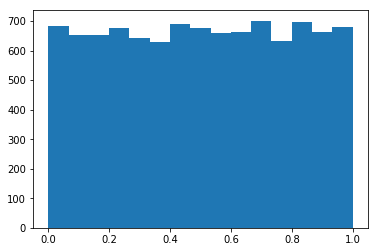

In [5]:
# Generating 10,000 random numbers to look at dist
y = np.random.rand(10000)
plt.hist(y, bins = 15)
plt.show()

As you can see from the histogram of 100,000 random generated samples, this function returns a value between 0 and 1, and the distribution is rectangular. 

**Note: Negative dimensions are not allowed.** So np.random.rand(-10) would give an error, as it's impossible to list a negative number of samples. 




### Generating random variables in an interval

There are several functions which can generate a random variable in the interval 0 to 1, not including 1. They include the random(), random_sample(), ranf() and sample() functions. They at first appear to be very similar to the rand() function, but it is not possible to generate multiple arrays of a specific size when using these functions. 

To generate one random number, you can write the function with no parameters, as the default is 1. 

In [3]:
np.random.sample()

0.9089307619132362

If we were to generate 1000 numbers, we can see the the distribution of values is uniform. 

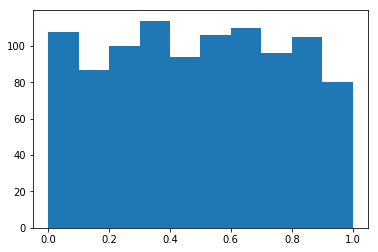

In [7]:
rand_f = np.random.ranf(1000)
plt.hist(rand_f)
plt.show()

We can take an array of random floats form 0 to 1, and then use that to generate values across a different interval. 


In [8]:
#Generating 10 random variables between 0 and 1
rand_f = np.random.random(10)

We can multiply all values in the array by 10, to get an array of floats from 0 to 10. 

In [9]:
10*(rand_f) 

array([3.63213251, 5.92516157, 4.37103931, 7.45127287, 2.30817617,
       4.35165032, 6.21460763, 1.5131931 , 5.59134627, 4.6896333 ])

We can then subtract 10 from every value in array, and get a set of values from - 10 to 0. 

In [10]:
10*(rand_f) - 10

array([-6.36786749, -4.07483843, -5.62896069, -2.54872713, -7.69182383,
       -5.64834968, -3.78539237, -8.4868069 , -4.40865373, -5.3103667 ])

And if we wanted an array from - 10 to 10, multiply a set of randomy generated floats by 20 and subtract 10. 

In [11]:
20*(rand_f) - 10 

array([-2.73573499,  1.85032314, -1.25792138,  4.90254573, -5.38364766,
       -1.29669936,  2.42921527, -6.97361381,  1.18269253, -0.6207334 ])

Similar strategies can be used to modify the interval of values rand() returns.

### Generating random integers that fit the Uniform Distribution.

When using Randint(), you set a low to high interval, from which randomly generated numbers are chosen. The low value is included in integers which may be returned but the high value in not. The third parameter is size; the number of random integers you want from within that range. If you don't include size, then only one random integer is generated.


Let's say I want to generate a random number between 2 and 100, excluding 100.

In [12]:
np.random.randint(2, 100)

54

Note, that this function will only work when the smallest number comes first. For example if you were to call np.rand.randint(100, 2), you would receive an error. 

Below a set of 2000 random integers are been generated. 

As I have only set one value, this function takes that number to be the high value, and generates numbers in the range 0 to high. Here my high is 30, so my generated set, contains 2000 numbers between 0 and 29 inclusive. We can see clearly that this function returns a values from the Uniform Distribution.

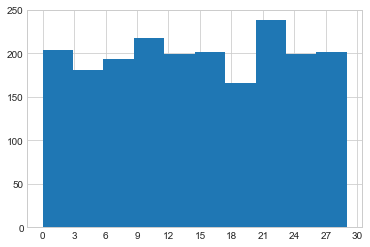

In [14]:
rand_int= np.random.randint(30, size = 2000)
sns.set_style('whitegrid')
plt.xticks(range(0, 31, 3))
plt.yticks(range(0, 251, 50))
plt.hist(rand_int)
plt.show()

### Generating random numbers from the Standard Normal Distribution

The Standard Normal Distribution has mean 0 and standard deviation 1. The randn() function can be used to generated random numbers and arrays, and almost all of the data generated will be between - 3 and +3. The Normal Distribution is often referred to as the bell curve, because of the shape of its distribution

Let's use this function to randomly generate 1000 numbers and see what normally distributed data looks like. 

In [5]:
#Generating 1000 random numbers
x = np.random.randn(1000)

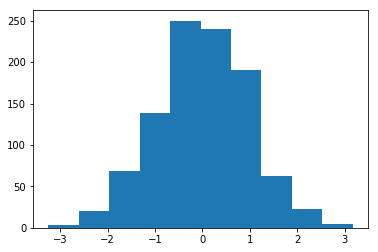

In [6]:
#Plotting the distribution of x in a histogram
plt.hist(x)
plt.show()

As expected, all of my values are between -3 and 3, and most of my values are between - 2 and 2. This is due to the Empirical Rule, which we will encounter in more detail later in this notebook. 

Arrays generated using this function can also be modified to generate an array of normally distributed random variables across a different inteval. For example if I take the sample set x, divide it by 3 and multiply by 100, I will get a range of values from - 100 to 100. 

C:\Users\mario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


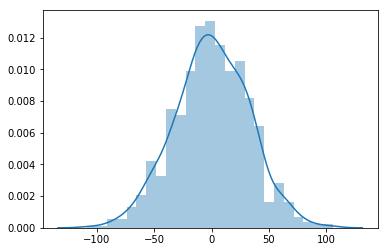

In [7]:
x = (x/3)*100
#Looking specifically at the density (percentage frequency)
sns.distplot(x, kde=True);


### Choosing a random sample

The choice( ) function produces a random sample, given a one-dimensional array. It can be used to choose numerical or categorical samples, and it's default is to replace the previous item, before choosing the next. 

If two members need to be chosen from a group of 7, for example. A 1-D array with categorical data in the form of names can be passed through this function. In this case, it's important that there is no replacement. So I can set replace to be False to avoid choosing the same person twice.

In [8]:
team =['Marina', 'Joseph', 'Alan', 'Fionn', 'Kayleigh', 'Yousef', 'Mauminah']
print(np.random.choice(team, 2, replace = False))


['Kayleigh' 'Yousef']


## Permutations

There are two functions which permutate the elements in a given set; np.random.shuffle() and np.random.permutation().

### Shuffle ()

Shuffle() modifies the array or list. So given a set containing the range of values from 0 to 9 inclusive. Shuffle will change the order of elements in that set. Now everytime you call that set in your code, you will be calling the set of shuffled elements. The documentation refers to this as shuffling items in place. 

In [19]:
#Generate and print range 0 to 9 
shuffle_range = np.arange(10)
print('A Range:  ', shuffle_range)

A Range:   [0 1 2 3 4 5 6 7 8 9]


In [20]:
#Shuffle the range
np.random.shuffle(shuffle_range)

#Print modified range
print('Shuffled: ', shuffle_range)

Shuffled:  [9 4 8 7 1 0 5 6 2 3]


Given multi-dimensional arrays, shuffle() works in a similar way. For example, if there is an array containing four 2x3 arrays, this function will modify the order in which the three arrays appear, but the content of each 2x3 array remains unchanged. So the elements in each row and column of the array remain the same.

In [21]:
# Generating 3 random arrays of positive integers
rand_int = np.random.randint(100)
a = np.around(np.random.rand(4, 2, 3)*rand_int)
print('Array: ')
print(a)

Array: 
[[[19.  7. 61.]
  [34. 46. 27.]]

 [[74.  6. 15.]
  [34. 52. 16.]]

 [[35. 40. 49.]
  [52. 60. 18.]]

 [[41. 76. 71.]
  [23. 40. 78.]]]


In [22]:
print('Shuffled: ')
np.random.shuffle(a)
print(a)

Shuffled: 
[[[74.  6. 15.]
  [34. 52. 16.]]

 [[35. 40. 49.]
  [52. 60. 18.]]

 [[19.  7. 61.]
  [34. 46. 27.]]

 [[41. 76. 71.]
  [23. 40. 78.]]]


Given a list, the output will remain a list. 

In [23]:
#Generate a range and set this as a list
a_list = np.arange(10).tolist()

#Shuffle
np.random.shuffle(a_list)
a_list

[1, 4, 3, 7, 2, 5, 6, 0, 9, 8]

### Permutation()

Permutation() makes a copy of the inputted array or list. It's output is the shuffled range of elements in the form of an array. 

Permutation() makes no changes to the original set.  

In [9]:
permute_range=np.arange(10)
print('A Range: ', permute_range)

A Range:  [0 1 2 3 4 5 6 7 8 9]


In [25]:
print('Permutation: ', np.random.permutation(permute_range))

Permutation:  [0 3 8 6 5 4 7 2 9 1]


If I want to permutate or shuffle all the positive integers in a range from 0 to some number (n), I can call permutation() with (n + 1) as a parameter. So if I was to permutate the numbers 0 to 9, I could also use this method.

In [26]:
np.random.permutation(10)

array([8, 2, 1, 5, 9, 6, 3, 4, 7, 0])

When I have a multi-dimensional array, permutations() works in the same way as shuffle(). Let's look at four 2x3 arrays again.

In [10]:
# Generating 4 random arrays of positive integers
rand_int = np.random.randint(100)
a = np.around(np.random.rand(4, 2, 3)*rand_int)
print('Array: ')
print(a)

Array: 
[[[77.  3. 94.]
  [61. 69.  3.]]

 [[95. 71. 52.]
  [47. 52. 33.]]

 [[54. 79. 65.]
  [31. 47. 70.]]

 [[43. 23. 65.]
  [85. 86. 91.]]]


Permutation() will shuffle the three arrays, but rows and columns within each array will remain unshuffled.

In [28]:
#Permutates the arrays, but keeps the rows/columns in each array the same
print('Permuation: ')
print(np.random.permutation(a))

Permuation: 
[[[ 0.  2.  7.]
  [ 8.  7. 21.]]

 [[ 4. 15. 20.]
  [20.  5. 13.]]

 [[18.  2. 18.]
  [12. 19.  5.]]

 [[12. 12.  1.]
  [10.  1. 22.]]]


Given a list, permutations() will always output an array. As shown here;

In [29]:
a_list = np.arange(10).tolist()

In [30]:
np.random.permutation(a_list)

array([9, 8, 2, 4, 6, 1, 5, 7, 3, 0])

## Distributions

The distribution refers to the spread of data in a set. The documentation also refers to the Probability Density Functions of these distributions. Probability density functions show the likelihood of possible outcomes in an experiment. So for every random variable $x$, the function shows the likelihood of $x$ occuring. 

In examining five distributions contained in the NumPy.random package, we will look at how to use these functions but also how they can be applied to modelling the probability of events.

### Uniform Distribution

**Discrete example:** The best known probability experiment that provides us with a Uniform Distribution involves rolling a fair die. Each outcome is equally likely and our results will be a discrete uniform distribution. Discrete data can only take certain values. In this experiment, we can only roll integers 1 to 6. You could never roll a die and get 2.45 as your result. So to model an experiment where our data is discrete and each outcome is equally likely, I have to use randint(). 

Now, I will simulate rolling a die 1000 times and see what the distribution of my results looks like. 

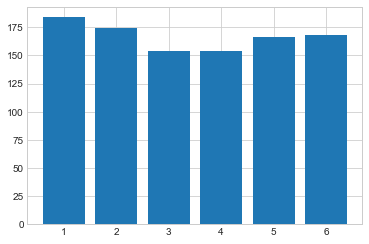

In [31]:
dice = np.random.randint(1, 7, 1000)
count = collections.Counter(dice).values()
x = [1, 2, 3, 4, 5, 6]
plt.bar(x, count)
plt.show()


**Uniform( )**, returns a random float, in a low to high interval and this data is continuous as it can have any value in that interval. Similar to the randint() function, your size cannot be a negative dimension. But in contrast to the randint() function, it is not necessary to call the low value first. 

For example, np.random.uniform(30, 1) and np.random.uniform(1, 30) will both return a value between 1 and 30. 

In [32]:
t = np.random.uniform(30, 1)
print(t)
t = np.random.uniform(1,30)
print(t)

19.816791657126068
4.803966810650636


**Continuous Example 1:** Let's say you press the button to call an elevator. The time it takes the elevator to reach your floor is uniformly distributed from 0 to 40 seconds, inclusive. As we're working with time, we know our distribution will be continuous. When the data is continuous and uniform, we can use Uniform( ) to simulate calling the elevator on multiple occasions and recording the length of time it takes to reach our floor. Let's call the elevator 30 times. 

The default low value is already zero. So to generate 30 numbers from 0 to 40, I only need to set my high value, and specify the size is 30. Uniform() does not include the high values in the interval of variables which can be generated. I have to set my high value equal to 41.

In [33]:
uni=np.random.uniform(41, size =30)
uni=np.around(uni, decimals=2).tolist()
print(uni)

[23.84, 36.41, 7.77, 21.05, 1.55, 15.43, 30.93, 1.69, 4.81, 30.06, 24.9, 13.06, 21.36, 20.28, 33.46, 1.83, 17.87, 18.21, 22.59, 28.26, 8.6, 6.03, 36.05, 19.87, 3.49, 21.21, 15.85, 31.08, 33.27, 16.44]


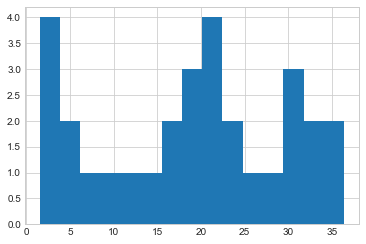

In [34]:
plt.hist(uni, bins = 15)
plt.show()

My data may not appear uniform, as I'm looking at a small sample of only 30 variables.

#### Comparing Distributions with Different Sample Sizes
In probability, it is best to conduct an experiment or a simulation a large number of times to ensure the data is representative. Similarily in statistics, it's important to take a large sample of a population. 

Below I have generated 20 numbers from the interval 0 to 100, and then 1000 numbers from the same interval. The larger sample size shows a more uniform spread of results, as we'd expected when sampling the uniform distribution. 

In [35]:
uni_sample=np.random.uniform(0, 100, size=20)

In [36]:
uni_sample2=(np.random.uniform(0, 100, size= 1000))

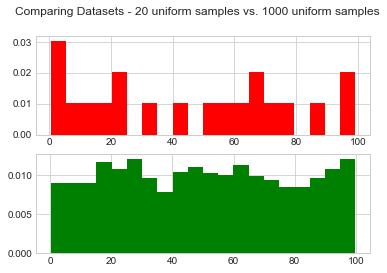

In [37]:
fig = plt.figure()
fig.suptitle('Comparing Datasets - 20 uniform samples vs. 1000 uniform samples')

ax1 = plt.subplot(2,1,1)
ax1.hist(uni_sample, color = 'r', bins = 20, density = True)

ax2 = plt.subplot(2, 1, 2)
ax2.hist(uni_sample2, color = 'g', bins = 20, density = True)

plt.show()

As expected, increasing the size of our set to 1000 values, instead of 20, gives us a more uniform spread of data. 

### Normal Distribution

A Normal Distribution is symmetrical about the mean of the set of data. To generate a set of values which follow the normal distribution, numpy.random provides two different functions; the standard_normal() and normal() functions.

Standard_normal() returns a number which fits the standard normal distribution, where the mean is 0 and standard deviation is 1. As the mean and deviation are set by default, the only parameter to be entered is the number of values we want to generate. Here, I have generated a set with 5000 values

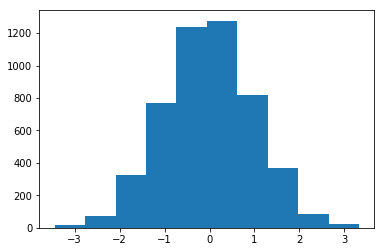

In [11]:
st_norm = np.random.standard_normal(5000)
plt.hist(st_norm)
plt.show()

To generate a random number that fits a different normal distribution, we need to know both the mean and the standard deviation of that set. Then we can use the np.random.normal() function

The Empirical Rule states that, in a normally distributed set, 68% of data is within one standard deviation of the mean, 95% of data is within two standard deviations, and 99.7% of data is found with in three standard deviations of the mean.

**Example 1:** Human body temperatures are normally distributed with a mean of 36.8&deg;C and a standard deviation from the mean of 0.4&deg;F.

Let's generate 1000 values, that model the distribution of human body temperatures.  

In [39]:
norm= np.random.normal(32, 5, 1000)

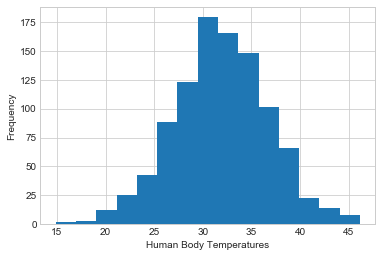

In [40]:
plt.hist(norm, bins=15)
plt.xlabel('Human Body Temperatures')
plt.ylabel('Frequency')
plt.show()

Above, I have a histogram that models the freuency of my random generated numbers from the normal distribution. As we may want to look at the probability of events occuring, rather than the frequency, I'll plot the density of my data instead. Now the y values are the percentage occurances of values in each interval, and the sum of the bars, or the sum of the area of the bars will equal 1.

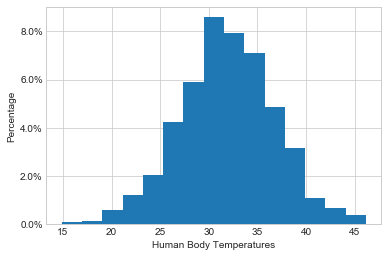

In [41]:
plt.hist(norm, bins=15,density = True)
plt.xlabel('Human Body Temperatures')
plt.ylabel('Percentage')

#Set the y axis to be percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

Now if I was to randomly take the temperature of one person, I could compare their result to this distribution and use the Empirical Rule to make inferences.

In [12]:
np.random.seed(1)

# Generating a random number from the normal dist., with mean 36.8 and st.dev. 0.4
norm_x =np.around(np.random.normal(36.8, 0.4), decimals = 2)
np.random.RandomState(1)
norm_x

37.45

My random sample has a temperature of 37.45. This seems high but it is still within two standard deviations of the mean and so 14.5% of samples would probably have a temperature between 37.2&deg;C and 37.6&deg;C. They may still want to check in with their doctor.

### Binomial Distribution

The Binomial Distribution in probability is the distribution of successes in  Binomial or Bernoulli trials. 

In a Bernoulli trial;
* There are n independent trials, ie. the outcome of one trial will not affect the outcome of another.
* Each trial has only two possible outcomes, ie Heads or Tails, Pass or Fail etc.
* The probability of success is the same in each trial, and is denoted with the letter p

So the random.binomial() function takes the same parameters and can be used to simulate probability experiments.

#### Flipping a Coin

If you flip a coin you can get either heads or tails, and each has a 50% chance of success. Let's say that I flip a coin 100 times, and I want to get heads. 

The binomial() function can simulate that experiment. 

The first parameter is the number of trials, which is 1, as I'm only going to do this once. The second parameter is the probability of getting Heads, which is 0.5, and the final parameter is the number of times this experiment is run. I flipped a coin 100 times, so I set the number of tests to be 100. 

In [43]:
heads = np.random.binomial(100, 0.5, 1)
print('I got %.0f heads, and %.0f tails in 100 trials' % (sum(heads), 100 - sum(heads)))

I got 47 heads, and 53 tails in 100 trials


Now what if I have 30 people all doing the same experiment. 

30 people each flip a coin 100 times and record their results, then we'd have 3000 flips of a coin. Our experimental probability should be even closer to our expected probability with that many trials. So let's run that simulation and see what we get.

In [44]:
new_heads = np.random.binomial(100, 0.5, 30)
print('We get %.0f heads, and %.0f tails in 3000 trials' % (sum(new_heads), 30*100 - sum(new_heads)))
prob_heads = sum(new_heads)/3000
print('Relative Frequency of Heads: %.0f %%' % (prob_heads*100))
print('Relative Frequency of Tails: %.0f %%' % ((1 - prob_heads)*100))

We get 1478 heads, and 1522 tails in 3000 trials
Relative Frequency of Heads: 49 %
Relative Frequency of Tails: 51 %


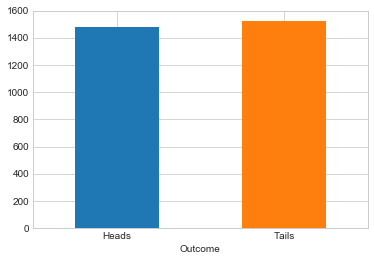

In [45]:
sum_heads = (np.sum(new_heads))
sum_tails = (3000 - sum_heads)

df = pd.DataFrame({'Outcome':['Heads', 'Tails'], 'Freq':[sum_heads, sum_tails]})
ax = df.plot.bar(x = 'Outcome', y = 'Freq', legend = None, rot= 0)

#### What does the Binomial Distribution look like?

If two people flip a coin 100 times, the distribution of heads will look like this. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


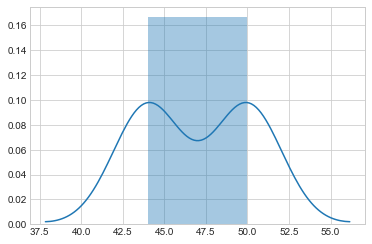

In [46]:
y = np.random.binomial(100, 0.5, 2)
sns.distplot(y);

If 30 people flip a coin 100 times each, the distribution of heads looks very different.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


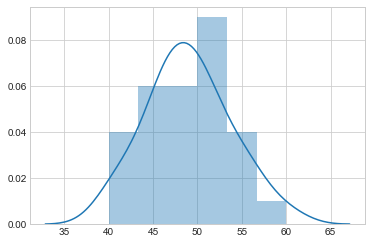

In [47]:
y = np.random.binomial(100, 0.5, 30)
sns.distplot(y);

As the number of trials increases my distribution has started to resemble the Normal Distribution. So let's continue this trend and see how close we can get to the normal distribution. If 100000 people were to flip a coin 100 times. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


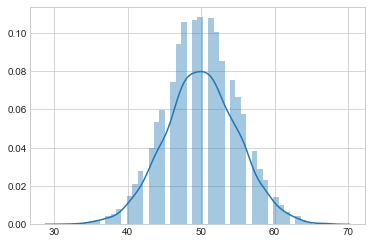

In [48]:
y = np.random.binomial (100, 0.5, 10000)
sns.distplot(y);

My data certainly appears to be normally distributed with mean of 50 and almost all values between 45 and 65. When I calculate the summary statistics, I'm getting a mean very close to 50 and standard deviation close to 5 as expected.

In [49]:
np.mean(y)

50.0455

In [50]:
np.std(y)

5.00162271168068

In fact, the binomial distribution can be approximated by a normal distribution for any fixed probability, as the number of trials is taken to infinity.

### Poisson Distribution

The Poisson distribution represents the frequency or the probability of events happening in a fixed interval of time. It is an appropriate model if the following assumptions are true:
- The number of times an event occurs is a positive integer, and so my data must be discrete.
- Events occur independently, so the occurance of one event does not affect the probability of another event.
- The rate at which events occur is constant. 

The Poisson distribution was first used to model the number of deaths by horse kicking in the Prussian army. It's more recently been used to model ocurrances such as car accidents, cancer diagnosis, phone calls to a particular building or sales.

**Example1:** The average number of homes sold by a real estate company is 2 homes per day. Let's look at the distribution of house sales over a year.

C:\Users\mario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


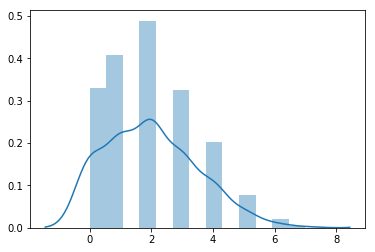

In [13]:
p = np.random.poisson(lam = 2, size = 365)
sns.distplot(p);

This isn't a very good representation of my data set as I should have a gap between the bins at 0 and at 1. Let's print the data just to confirm it is discrete.

In [14]:
print(p)

[0 1 0 1 2 2 0 3 3 3 0 2 4 2 4 0 2 1 0 2 1 1 2 2 0 4 1 1 1 5 2 5 3 2 0 2 4
 3 1 1 4 0 0 0 2 2 3 0 3 3 0 0 0 0 2 0 0 2 2 3 3 0 0 3 3 2 0 2 1 2 3 0 4 3
 3 5 2 0 1 2 1 0 4 5 2 3 2 2 3 5 2 5 2 2 4 2 4 5 3 0 1 3 2 2 4 0 1 2 3 0 2
 3 2 1 3 4 4 3 3 3 6 1 0 1 0 4 3 1 2 1 2 4 3 3 1 1 4 4 0 0 0 1 0 3 2 3 1 1
 1 4 1 6 1 0 1 2 3 3 1 2 3 3 0 2 2 5 0 1 1 2 2 1 2 1 7 0 0 3 5 0 2 2 0 3 2
 1 2 1 0 2 4 0 5 2 2 3 2 3 1 1 1 0 2 1 3 4 0 2 2 2 2 3 4 2 1 3 0 1 1 1 1 2
 0 2 1 1 2 1 4 2 6 4 0 3 1 3 2 3 2 2 4 0 4 2 3 3 3 1 2 3 2 5 2 2 1 4 4 1 1
 2 4 2 1 3 4 4 2 0 2 2 1 2 2 1 0 4 1 2 2 1 4 2 2 4 3 5 1 1 0 1 1 3 3 1 2 2
 5 2 4 1 1 5 2 1 4 1 0 1 3 3 0 2 2 0 2 0 1 0 2 5 0 3 4 1 1 1 0 2 2 4 3 3 4
 0 1 4 0 0 1 0 3 2 4 1 2 1 2 1 6 3 4 2 0 3 2 0 3 3 3 0 1 1 2 3 1]


That looks correct. 

I know that the events in a Poisson experiment should have the same mean and variance. Let's check that those to values are similar for this sample set, p. 

In [15]:
np.mean(p)

2.0

In [16]:
np.var(p)

2.158904109589041

### Chi-Squared Distribution

The Chi-Squared Test is a type of hypothesis test, which determines if there is any relationship between observed and expected values in more than one category of a population. So it's best suited to categorical data.  


The np.random.chisquare() modules takes two parameters, df or degrees of freedom and size of sample.

In [51]:
s1 = np.random.chisquare(2, 300)

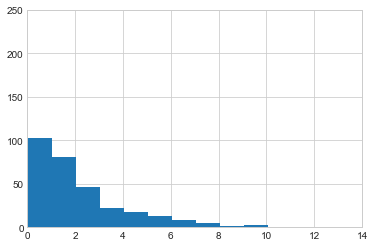

In [52]:
plt.hist(s1)
plt.xlim(0, 14, 2)
plt.ylim(0, 250, 10)
plt.show()

In [53]:
s2 = np.random.chisquare(4, 300)

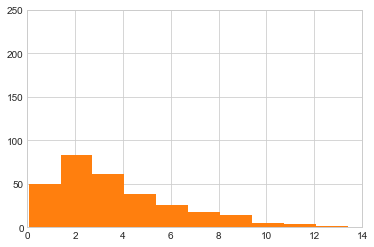

In [54]:
plt.hist(s2, color = 'tab:orange')
plt.ylim(0, 250, 10)
plt.xlim(0, 14, 2)
plt.show()

In [55]:
s3 = np.random.chisquare(6, 300)
s4 = np.random.chisquare(12, 300)

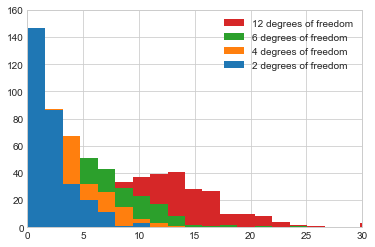

In [56]:
plt.hist([s1, s2, s3, s4], 
         label = ['2 degrees of freedom', '4 degrees of freedom', '6 degrees of freedom', 
                  '12 degrees of freedom'], histtype = 'stepfilled', bins = 20)
plt.xlim(0, 30)
plt.ylim(0, 160)
plt.legend()
plt.show()

### FIve

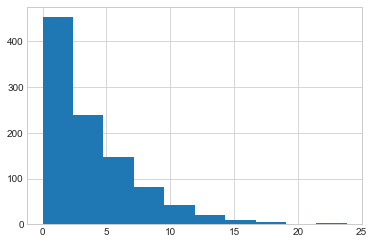

In [57]:
dist_gama = np.random.gamma(1, 4, 1000)
plt.hist(dist_gama)
plt.show()

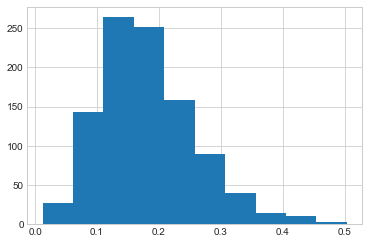

In [58]:
beta_hist = np.random.beta(4.5, 20, 1000)
plt.hist(beta_hist)
plt.show()

## Seeds and Pseudo-random Numbers

The numbers generated by all of the functions above are pseudo random numbers. 

The seed is essentially the place we choose to begin our random generator. If it always begins in the same place, then are guaranteed the same outputs. 

To set the seed, we call np.random.seed(), and input any integer between  0 and (2^32) - 1 as the parameter. It can also take arrays of similar integers. 

For the purposes of my investigation, I will set the seed to be 42. It's a commonly used seed that appears to be a Hitchhikers Guide to the Galaxy reference. 

In [85]:
np.random.seed(42)

So my seed is set. Now if I want to print the exact same output again, I first need to remind my machine of that seed. 

To do this we use the RandomState() class, and set the parameter to be the same as we previously had in the seed() function.  Then call the array of randomly generated values you want, and if we call the same array twice, you will get the exact same output both times.

_Note that in my libraries, I hav already imported RandomState from np.random._

Let's begin by outputting 5 random numbers between 0 and 10.

In [17]:
r = RandomState(42)
r.uniform(0, 10, 5)

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ])

In [18]:
r = RandomState(42)
r.uniform(0, 10, 5)

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ])

In [19]:
r = RandomState(42)
r.randn(10)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [20]:
r = RandomState(42)
r.randn(10)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [21]:
r = RandomState(42)
r.normal()

0.4967141530112327

In [22]:
r = RandomState(42)
r.normal()

0.4967141530112327

## References

* [NumPy v1.15 Manual, Random sampling (numpy.random)](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)
* [Travis Oliphant - Python's Role in Big Data Analytics: Past, Present, and Future(Video Lecture)](https://www.youtube.com/watch?v=18r346Tn768)
* [6 Common Probability Distributions every data science professional should know](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)
* [Common Probability Distributions: The Data Scientist’s Crib Sheet](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)
* [Seaborn: Statistical Data Visualisation Tutorial](https://seaborn.pydata.org/tutorial.html)
    * [Barplot documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)
* [Chi - Squared Test (wikipedia page](https://en.wikipedia.org/wiki/Chi-squared_test)
* [Chi-Square Independence test, an example on www.spss-tutorials.com](https://www.spss-tutorials.com/chi-square-independence-test/)
* [Python 3 Documentation](https://docs.python.org/3/)
    * [Collections](https://docs.python.org/2/library/collections.html])
* Stack Overflow - Webpages consulted
    * [Difference between np.random.seed and np.random.RandomState](https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate)
    * [Random Seed: What does it do?](https://stackoverflow.com/questions/22639587/random-seed-what-does-it-do)
    * [Plot a bar graph from pandas dataframe](https://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe)
    * [Getting random shuffle to work](https://stackoverflow.com/questions/47516428/cant-get-random-shuffle-to-work-python-random-shuffle)
    * [Shuffle vs. Permutation in NumPy](https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy )